## **Estimación de enfermedades cardiacas**

En el siguiente notebook se realiza la predicción de enfermedades cardiacas en base a características médicas proporcionadas para cada persona.

Dataset disponible en: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

### **1. Importación de librerias y de los datos**

In [84]:
# importar librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# herramientas
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# escalamiento y normalizacion
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
# imputers
from sklearn.impute import SimpleImputer
# metricas
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
# mejoras
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [196]:
# datos y conversion a dataframe
df = pd.read_csv('heart_2022.csv')
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

### **2. Limpieza de los datos**

En esta sección se busca realizar una limpieza de los datos, como rellenar datos faltantes, igualar tipos de datos y encontrar datos duplicados. El analisis se lleva a cabo en el dataset de train unicamente.

In [172]:
# dataset
df.head(5).T

,0,1,2,3,4
State,Alabama,Alabama,Alabama,Alabama,Alabama
Sex,Female,Female,Female,Female,Female
GeneralHealth,Very good,Excellent,Very good,Excellent,Fair
PhysicalHealthDays,0.0,0.0,2.0,0.0,2.0
MentalHealthDays,0.0,0.0,3.0,0.0,0.0
LastCheckupTime,Within past year (anytime less than 12 months ...,NaN,Within past year (anytime less than 12 months ...,Within past year (anytime less than 12 months ...,Within past year (anytime less than 12 months ...
PhysicalActivities,No,No,Yes,Yes,Yes
SleepHours,8.0,6.0,5.0,7.0,9.0
RemovedTeeth,NaN,NaN,NaN,NaN,NaN
HadHeartAttack,No,No,No,No,No


In [173]:
# info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [174]:
# estadisticas
print("Estadistica descriptiva del dataset")
df.describe()

Estadistica descriptiva del dataset


,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [175]:
# tipos de datos
df.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

In [176]:
# duplicados
df.duplicated().sum()

157

Se analizan los valores unicos de las columnas categoricas.

In [197]:
# extraer las columnas tipo object
object_columns = df.select_dtypes(include=['object'])

# identificar sus valores unicos 
for column in object_columns:
    unique_values = object_columns[column].unique()
    print(f"Columna '{column}': {unique_values}")

Columna 'State': ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
Columna 'Sex': ['Female' 'Male']
Columna 'GeneralHealth': ['Very good' 'Excellent' 'Fair' 'Poor' 'Good' nan]
Columna 'LastCheckupTime': ['Within past year (anytime less than 12 months ago)' nan
 'Within past 2 years (1 year but less than 2 years ago)'
 'Within past 5 years (2 years but less than 5 years ago)'
 '5 or more years ago']
Colu

Hay muchos que tienen solamente datos de yes o no. 

In [178]:
# ver solo yes o no
for column in object_columns:
    unique_values = df[column].unique()
    if 'Yes' in unique_values and 'No' in unique_values:
        print(f"Columna '{column}' tiene los valores únicos: {unique_values}")

Columna 'PhysicalActivities' tiene los valores únicos: ['No' 'Yes' nan]
Columna 'HadHeartAttack' tiene los valores únicos: ['No' 'Yes' nan]
Columna 'HadAngina' tiene los valores únicos: ['No' 'Yes' nan]
Columna 'HadStroke' tiene los valores únicos: ['No' 'Yes' nan]
Columna 'HadAsthma' tiene los valores únicos: ['No' 'Yes' nan]
Columna 'HadSkinCancer' tiene los valores únicos: ['No' 'Yes' nan]
Columna 'HadCOPD' tiene los valores únicos: ['No' 'Yes' nan]
Columna 'HadDepressiveDisorder' tiene los valores únicos: ['No' 'Yes' nan]
Columna 'HadKidneyDisease' tiene los valores únicos: ['No' 'Yes' nan]
Columna 'HadArthritis' tiene los valores únicos: ['No' 'Yes' nan]
Columna 'HadDiabetes' tiene los valores únicos: ['Yes' 'No' 'No, pre-diabetes or borderline diabetes' nan
 'Yes, but only during pregnancy (female)']
Columna 'DeafOrHardOfHearing' tiene los valores únicos: ['No' nan 'Yes']
Columna 'BlindOrVisionDifficulty' tiene los valores únicos: ['No' 'Yes' nan]
Columna 'DifficultyConcentrating

Consistencia en datos categoricos se convierte todo a minuscula

In [198]:
# convertir a minusculas
for column in object_columns:
    df[column] = df[column].str.lower()
    unique_values = df[column].unique()
    print(f"Columna '{column}': {unique_values}")

Columna 'State': ['alabama' 'alaska' 'arizona' 'arkansas' 'california' 'colorado'
 'connecticut' 'delaware' 'district of columbia' 'florida' 'georgia'
 'hawaii' 'idaho' 'illinois' 'indiana' 'iowa' 'kansas' 'kentucky'
 'louisiana' 'maine' 'maryland' 'massachusetts' 'michigan' 'minnesota'
 'mississippi' 'missouri' 'montana' 'nebraska' 'nevada' 'new hampshire'
 'new jersey' 'new mexico' 'new york' 'north carolina' 'north dakota'
 'ohio' 'oklahoma' 'oregon' 'pennsylvania' 'rhode island' 'south carolina'
 'south dakota' 'tennessee' 'texas' 'utah' 'vermont' 'virginia'
 'washington' 'west virginia' 'wisconsin' 'wyoming' 'guam' 'puerto rico'
 'virgin islands']
Columna 'Sex': ['female' 'male']
Columna 'GeneralHealth': ['very good' 'excellent' 'fair' 'poor' 'good' nan]
Columna 'LastCheckupTime': ['within past year (anytime less than 12 months ago)' nan
 'within past 2 years (1 year but less than 2 years ago)'
 'within past 5 years (2 years but less than 5 years ago)'
 '5 or more years ago']
Colu

En esta sección se analiza los valores faltantes en las columnas y se buscan métodos para rellenarlos en caso de ser necesario.

In [180]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
TetanusLast10Tdap,362616,82516,18.54
PneumoVaxEver,368092,77040,17.31
HIVTesting,379005,66127,14.86
ChestScan,389086,56046,12.59
CovidPos,394368,50764,11.40
HighRiskLastYear,394509,50623,11.37
BMI,396326,48806,10.96
FluVaxLast12,398011,47121,10.59
AlcoholDrinkers,398558,46574,10.46
WeightInKilograms,403054,42078,9.45


Se observan muchos datos faltantes en el dataset.

In [152]:
# faltantes en tetanus
df.loc[df['TetanusLast10Tdap'].isnull()].T

,2,13,19,20,22,30,38,40,45,49,...,445072,445073,445075,445076,445101,445102,445103,445118,445125,445126
State,alabama,alabama,alabama,alabama,alabama,alabama,alabama,alabama,alabama,alabama,...,virgin islands,virgin islands,virgin islands,virgin islands,virgin islands,virgin islands,virgin islands,virgin islands,virgin islands,virgin islands
Sex,female,male,female,female,female,female,male,female,female,female,...,male,female,male,male,female,male,female,female,male,male
GeneralHealth,very good,very good,very good,very good,fair,good,very good,fair,good,good,...,good,NaN,good,very good,good,good,good,fair,good,good
PhysicalHealthDays,2.0,0.0,0.0,4.0,30.0,2.0,8.0,0.0,5.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
MentalHealthDays,3.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,...,30.0,NaN,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
LastCheckupTime,within past year (anytime less than 12 months ...,within past year (anytime less than 12 months ...,within past year (anytime less than 12 months ...,within past year (anytime less than 12 months ...,within past year (anytime less than 12 months ...,within past year (anytime less than 12 months ...,within past year (anytime less than 12 months ...,within past year (anytime less than 12 months ...,within past year (anytime less than 12 months ...,within past year (anytime less than 12 months ...,...,within past 5 years (2 years but less than 5 y...,within past year (anytime less than 12 months ...,within past 5 years (2 years but less than 5 y...,within past year (anytime less than 12 months ...,within past year (anytime less than 12 months ...,within past 5 years (2 years but less than 5 y...,within past year (anytime less than 12 months ...,within past year (anytime less than 12 months ...,within past year (anytime less than 12 months ...,within past 2 years (1 year but less than 2 ye...
PhysicalActivities,yes,yes,yes,yes,yes,yes,yes,no,no,yes,...,yes,yes,yes,yes,yes,yes,no,yes,yes,yes
SleepHours,5.0,8.0,6.0,6.0,7.0,7.0,6.0,6.0,8.0,7.0,...,7.0,NaN,8.0,10.0,8.0,8.0,12.0,6.0,5.0,8.0
RemovedTeeth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,none of them,1 to 5,1 to 5,none of them,none of them,1 to 5,none of them,1 to 5,NaN,none of them
HadHeartAttack,no,no,no,no,no,no,yes,no,no,no,...,NaN,no,no,no,no,no,yes,no,no,no


Las colummas que tienen valores de yes o no seran rellenadas con la moda.

In [199]:
# rellenar los valores con la moda
for column in object_columns:
    # Convertir a minúsculas para estandarizar
    df[column] = df[column].str.lower()
    
    # Verificar si los valores únicos corresponden a 'yes' o 'no'
    unique_values = df[column].unique()
    if {'yes', 'no'}.issuperset(set(filter(pd.notna, unique_values))):
        # Rellenar valores faltantes con la moda
        mode_value = df[column].mode()[0]  # Calcular la moda
        df[column].fillna(mode_value, inplace=True)
        print(f"Columna '{column}' tiene los valores únicos: {unique_values} y fue rellenada con: {mode_value}")


C:\Users\Admin\AppData\Local\Temp\ipykernel_4920\2419113194.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)


Columna 'PhysicalActivities' tiene los valores únicos: ['no' 'yes' nan] y fue rellenada con: yes
Columna 'HadHeartAttack' tiene los valores únicos: ['no' 'yes' nan] y fue rellenada con: no
Columna 'HadAngina' tiene los valores únicos: ['no' 'yes' nan] y fue rellenada con: no
Columna 'HadStroke' tiene los valores únicos: ['no' 'yes' nan] y fue rellenada con: no
Columna 'HadAsthma' tiene los valores únicos: ['no' 'yes' nan] y fue rellenada con: no
Columna 'HadSkinCancer' tiene los valores únicos: ['no' 'yes' nan] y fue rellenada con: no
Columna 'HadCOPD' tiene los valores únicos: ['no' 'yes' nan] y fue rellenada con: no
Columna 'HadDepressiveDisorder' tiene los valores únicos: ['no' 'yes' nan] y fue rellenada con: no
Columna 'HadKidneyDisease' tiene los valores únicos: ['no' 'yes' nan] y fue rellenada con: no
Columna 'HadArthritis' tiene los valores únicos: ['no' 'yes' nan] y fue rellenada con: no
Columna 'DeafOrHardOfHearing' tiene los valores únicos: ['no' nan 'yes'] y fue rellenada co

In [182]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
TetanusLast10Tdap,362616,82516,18.54
CovidPos,394368,50764,11.40
BMI,396326,48806,10.96
WeightInKilograms,403054,42078,9.45
ECigaretteUsage,409472,35660,8.01
SmokerStatus,409670,35462,7.97
HeightInMeters,416480,28652,6.44
RaceEthnicityCategory,431075,14057,3.16
RemovedTeeth,433772,11360,2.55
PhysicalHealthDays,434205,10927,2.45


Se verifica los valores unicos de las columnas restantes.
TetanusLast10Tdap	
CovidPos	
BMI	
WeightInKilograms
ECigaretteUsage
SmokerStatus	
HeightInMeters	
RaceEthnicityCategory	
RemovedTeeth	
PhysicalHealthDays	
MentalHealthDays	
AgeCategory	
LastCheckupTime	
SleepHours	
GeneralHealth	
HadDiabetes

In [200]:
# verificar valores unicos
# columnas a analizar
columns_to_check = ['CovidPos', 'BMI', 'WeightInKilograms', 'ECigaretteUsage', 'SmokerStatus',
    'HeightInMeters', 'RaceEthnicityCategory', 'RemovedTeeth', 'PhysicalHealthDays',
    'MentalHealthDays', 'AgeCategory', 'LastCheckupTime', 'SleepHours',
    'GeneralHealth', 'HadDiabetes']

# valores unicos
for column in columns_to_check:
    if column in df.columns:  
        unique_values = df[column].unique()
        print(f"Columna '{column}' tiene los valores únicos: {unique_values}")
    else:
        print(f"Columna '{column}' no encontrada en el DataFrame.")


Columna 'CovidPos' tiene los valores únicos: ['no' 'yes' nan
 'tested positive using home test without a health professional']
Columna 'BMI' tiene los valores únicos: [  nan 26.57 25.61 ... 13.51 28.39 48.63]
Columna 'WeightInKilograms' tiene los valores únicos: [   nan  68.04  63.5   53.98  84.82  62.6   73.48  81.65  74.84  59.42
  85.28 106.59  71.21  64.41  61.23  90.72  65.77  66.22  80.29  86.18
  47.63 107.05  57.15 105.23  77.11  56.7   79.38 113.4  102.06  59.87
 104.33  53.52  61.69 136.08  34.47  99.79 127.01  78.93  95.25  58.97
  92.08  72.57  83.91  49.9  117.93  71.67 102.97  62.14  83.46  54.43
  94.35  60.78 117.03  65.32  76.66  88.45  89.81  74.39  68.95  79.83
 108.41  90.26  55.79  91.63  47.17  78.02  50.8   91.17  84.37 145.15
  93.89 122.47  48.99  73.94  88.9   80.74  81.19 158.76  97.52  51.71
  82.55  76.2   68.49  75.3   70.31  63.05  60.33 115.67  86.64 108.86
  92.53 124.74  43.09  58.51  63.96  92.99  44.45 128.82  98.88  45.36
 110.68  46.72  58.06  73.0

In [201]:
# df types
df.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

BMI, height, weight in kilograms son columnas del tipo float y se va rellenar con la mediana.

In [202]:
# rellenar con la mediana
df['BMI'] = df['BMI'].fillna(df['BMI'].median()).astype(float)
df['WeightInKilograms'] = df['WeightInKilograms'].fillna(df['WeightInKilograms'].median()).astype(float)
df['HeightInMeters'] = df['HeightInMeters'].fillna(df['HeightInMeters'].median()).astype(float)
df['PhysicalHealthDays'] = df['PhysicalHealthDays'].fillna(df['PhysicalHealthDays'].median()).astype(float)
df['MentalHealthDays'] = df['MentalHealthDays'].fillna(df['MentalHealthDays'].median()).astype(float)
df['SleepHours'] = df['SleepHours'].fillna(df['SleepHours'].median()).astype(float)

In [186]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
TetanusLast10Tdap,362616,82516,18.54
CovidPos,394368,50764,11.40
ECigaretteUsage,409472,35660,8.01
SmokerStatus,409670,35462,7.97
RaceEthnicityCategory,431075,14057,3.16
RemovedTeeth,433772,11360,2.55
AgeCategory,436053,9079,2.04
LastCheckupTime,436824,8308,1.87
GeneralHealth,443934,1198,0.27
HadDiabetes,444045,1087,0.24


In [203]:
# verificar valores unicos
# columnas a analizar
columns_to_check = ['CovidPos', 'ECigaretteUsage', 'SmokerStatus', 'RaceEthnicityCategory', 'RemovedTeeth', 'AgeCategory', 'LastCheckupTime',
        'GeneralHealth', 'HadDiabetes','TetanusLast10Tdap']

# valores unicos
for column in columns_to_check:
    if column in df.columns:  
        unique_values = df[column].unique()
        print(f"Columna '{column}' tiene los valores únicos: {unique_values}")
    else:
        print(f"Columna '{column}' no encontrada en el DataFrame.")

Columna 'CovidPos' tiene los valores únicos: ['no' 'yes' nan
 'tested positive using home test without a health professional']
Columna 'ECigaretteUsage' tiene los valores únicos: ['not at all (right now)' 'never used e-cigarettes in my entire life' nan
 'use them every day' 'use them some days']
Columna 'SmokerStatus' tiene los valores únicos: ['never smoked' 'current smoker - now smokes some days' 'former smoker'
 nan 'current smoker - now smokes every day']
Columna 'RaceEthnicityCategory' tiene los valores únicos: ['white only, non-hispanic' 'black only, non-hispanic'
 'other race only, non-hispanic' 'multiracial, non-hispanic' nan
 'hispanic']
Columna 'RemovedTeeth' tiene los valores únicos: [nan 'none of them' '1 to 5' '6 or more, but not all' 'all']
Columna 'AgeCategory' tiene los valores únicos: ['age 80 or older' 'age 55 to 59' nan 'age 40 to 44' 'age 75 to 79'
 'age 70 to 74' 'age 65 to 69' 'age 60 to 64' 'age 50 to 54'
 'age 45 to 49' 'age 35 to 39' 'age 25 to 29' 'age 30 to 3

Se rellenan con la moda

In [204]:
# rellenar con la moda
df['CovidPos'] = df['CovidPos'].fillna(df['CovidPos'].mode()[0])
df['ECigaretteUsage'] = df['ECigaretteUsage'].fillna(df['ECigaretteUsage'].mode()[0])
df['SmokerStatus'] = df['SmokerStatus'].fillna(df['SmokerStatus'].mode()[0])
df['RaceEthnicityCategory'] = df['RaceEthnicityCategory'].fillna(df['RaceEthnicityCategory'].mode()[0])
df['RemovedTeeth'] = df['RemovedTeeth'].fillna(df['RemovedTeeth'].mode()[0])
df['AgeCategory'] = df['AgeCategory'].fillna(df['AgeCategory'].mode()[0])
df['LastCheckupTime'] = df['LastCheckupTime'].fillna(df['LastCheckupTime'].mode()[0])
df['GeneralHealth'] = df['GeneralHealth'].fillna(df['GeneralHealth'].mode()[0])
df['HadDiabetes'] = df['HadDiabetes'].fillna(df['HadDiabetes'].mode()[0])
df['TetanusLast10Tdap'] = df['TetanusLast10Tdap'].fillna(df['TetanusLast10Tdap'].mode()[0])

In [205]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
State,445132,0,0.0
Sex,445132,0,0.0
DifficultyWalking,445132,0,0.0
DifficultyDressingBathing,445132,0,0.0
DifficultyErrands,445132,0,0.0
SmokerStatus,445132,0,0.0
ECigaretteUsage,445132,0,0.0
ChestScan,445132,0,0.0
RaceEthnicityCategory,445132,0,0.0
AgeCategory,445132,0,0.0


Se verifica la distribucion de los datos.

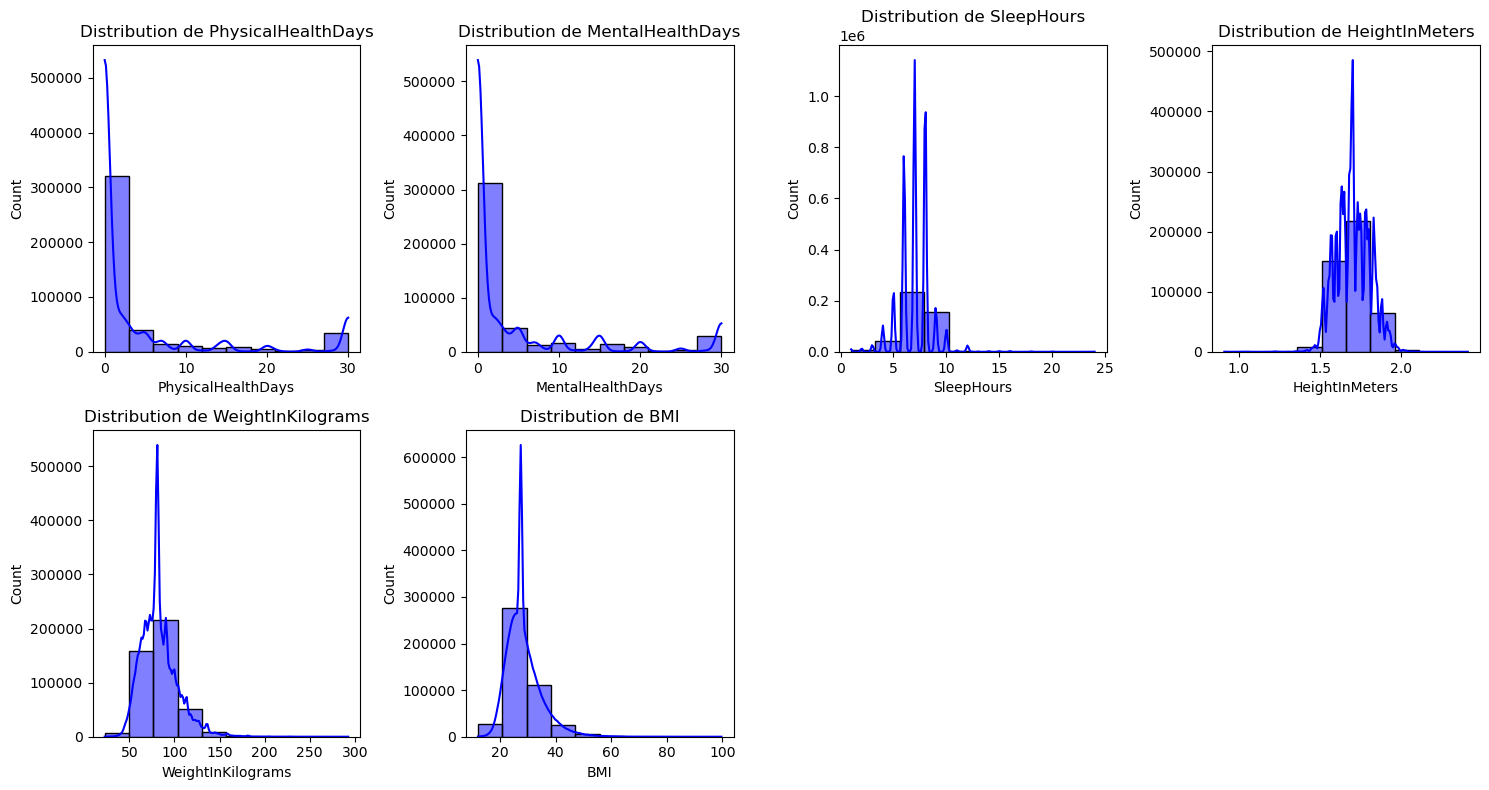

In [163]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 4
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# distribucion de los datos
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i) 
    sns.histplot(df[col], kde=True, color="blue", bins=10)  
    plt.title(f"Distribution de {col}")
    plt.tight_layout()

plt.show()

Distribucion de los outliers

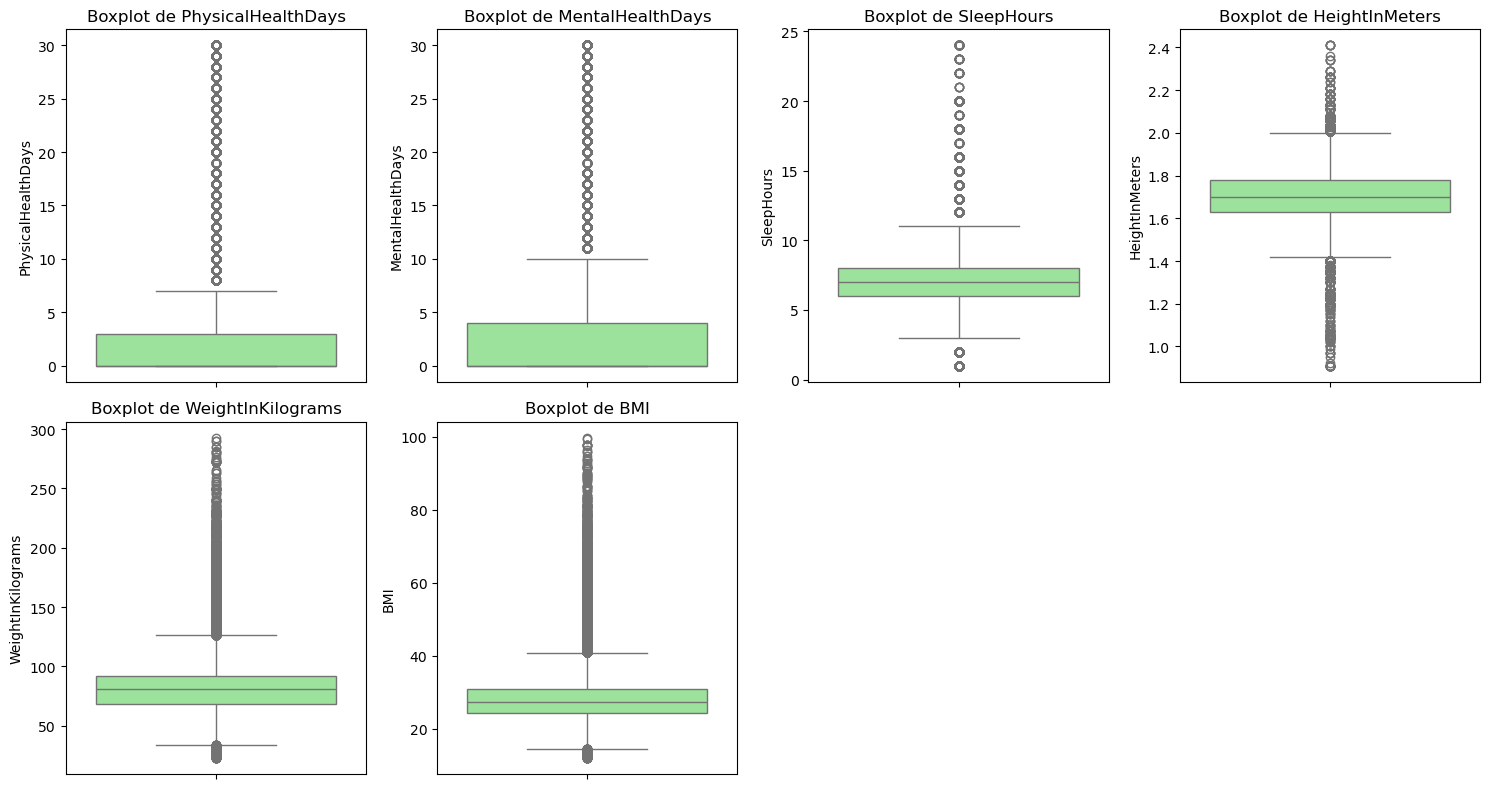

In [164]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 4
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# crear boxplots 
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i) 
    sns.boxplot(y=df[col], color="lightgreen")
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()

plt.show()

Las variables del tipo categoricas que tienen comportamiento binario se convierten a binarios, con 1 indicando presencia o afirmación y 0 en el caso contrario.

In [206]:
# columnas binarias
binary_columns = [
    'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer',
    'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
    'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing',
    'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers', 'HIVTesting',
    'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear', 'CovidPos'
]

# mapear valores
binary_mapping = {
    'yes': 1,
    'no': 0,
    'no, pre-diabetes or borderline diabetes': 0, # no
    'yes, but only during pregnancy (female)': 1,  # yes
    'tested positive using home test without a health professional': 1  # yes
}

# transformar
for col in binary_columns:
    df[col] = df[col].map(binary_mapping)  

In [207]:
# df
df.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                 int64
HadAngina                      int64
HadStroke                      int64
HadAsthma                      int64
HadSkinCancer                  int64
HadCOPD                        int64
HadDepressiveDisorder          int64
HadKidneyDisease               int64
HadArthritis                   int64
HadDiabetes                    int64
DeafOrHardOfHearing            int64
BlindOrVisionDifficulty        int64
DifficultyConcentrating        int64
DifficultyWalking              int64
DifficultyDressingBathing      int64
DifficultyErrands              int64
SmokerStatus                  object
ECigaretteUsage               object
C

In [208]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
State,445132,0,0.0
Sex,445132,0,0.0
DifficultyWalking,445132,0,0.0
DifficultyDressingBathing,445132,0,0.0
DifficultyErrands,445132,0,0.0
SmokerStatus,445132,0,0.0
ECigaretteUsage,445132,0,0.0
ChestScan,445132,0,0.0
RaceEthnicityCategory,445132,0,0.0
AgeCategory,445132,0,0.0


Se extraen las columnas categóricas restantes.

In [209]:
# extraer las columnas tipo object
object_columns = df.select_dtypes(include=['object'])

# identificar sus valores unicos 
for column in object_columns:
    unique_values = object_columns[column].unique()
    print(f"Columna '{column}': {unique_values}")

Columna 'State': ['alabama' 'alaska' 'arizona' 'arkansas' 'california' 'colorado'
 'connecticut' 'delaware' 'district of columbia' 'florida' 'georgia'
 'hawaii' 'idaho' 'illinois' 'indiana' 'iowa' 'kansas' 'kentucky'
 'louisiana' 'maine' 'maryland' 'massachusetts' 'michigan' 'minnesota'
 'mississippi' 'missouri' 'montana' 'nebraska' 'nevada' 'new hampshire'
 'new jersey' 'new mexico' 'new york' 'north carolina' 'north dakota'
 'ohio' 'oklahoma' 'oregon' 'pennsylvania' 'rhode island' 'south carolina'
 'south dakota' 'tennessee' 'texas' 'utah' 'vermont' 'virginia'
 'washington' 'west virginia' 'wisconsin' 'wyoming' 'guam' 'puerto rico'
 'virgin islands']
Columna 'Sex': ['female' 'male']
Columna 'GeneralHealth': ['very good' 'excellent' 'fair' 'poor' 'good']
Columna 'LastCheckupTime': ['within past year (anytime less than 12 months ago)'
 'within past 2 years (1 year but less than 2 years ago)'
 'within past 5 years (2 years but less than 5 years ago)'
 '5 or more years ago']
Columna 'Phy

Con las columnas categóricas restantes se hace lo mismo. Sin embargo, con las variables que tienen mas de un valor se les asigna variables extras. Por ejemplo, la columna LastCheckUpTime: '5 or more years ago': 0, 'within past 5 years (2 years but less than 5 years ago)': 1, 'within past 2 years (1 year but less than 2 years ago)': 2, within past year (anytime less than 12 months ago)': 3

In [210]:
# Diccionarios para mapeo personalizado
mapping_dict = {
    'Sex': {'female': 0, 'male': 1},
    'GeneralHealth': {'poor': 0, 'fair': 1, 'good': 2, 'very good': 3, 'excellent': 4},
    'LastCheckupTime': {
        '5 or more years ago': 0, 
        'within past 5 years (2 years but less than 5 years ago)': 1,
        'within past 2 years (1 year but less than 2 years ago)': 2, 
        'within past year (anytime less than 12 months ago)': 3
    },
    'PhysicalActivities': {'no': 0, 'yes': 1},
    'RemovedTeeth': {'none of them': 0, '1 to 5': 1, '6 or more, but not all': 2, 'all': 3},
    'SmokerStatus': {
        'never smoked': 0, 
        'former smoker': 1,
        'current smoker - now smokes some days': 2, 
        'current smoker - now smokes every day': 3
    },
    'ECigaretteUsage': {
        'never used e-cigarettes in my entire life': 0, 
        'not at all (right now)': 1,
        'use them some days': 2, 
        'use them every day': 3
    },
    'RaceEthnicityCategory': {
        'white only, non-hispanic': 0, 
        'black only, non-hispanic': 1, 
        'hispanic': 2, 
        'other race only, non-hispanic': 3,
        'multiracial, non-hispanic': 4
    },
    'AgeCategory': {
        'age 18 to 24': 0, 'age 25 to 29': 1, 'age 30 to 34': 2, 'age 35 to 39': 3,
        'age 40 to 44': 4, 'age 45 to 49': 5, 'age 50 to 54': 6, 'age 55 to 59': 7,
        'age 60 to 64': 8, 'age 65 to 69': 9, 'age 70 to 74': 10, 'age 75 to 79': 11,
        'age 80 or older': 12
    },
    'TetanusLast10Tdap': {
        'no, did not receive any tetanus shot in the past 10 years': 0,
        'yes, received tetanus shot but not sure what type': 1, 
        'yes, received tetanus shot, but not tdap': 2,
        'yes, received tdap': 3
    }
}

# transformar
for column, mapping in mapping_dict.items():
    # Registrar valores no mapeados
    unmatched_values = df[~df[column].isin(mapping.keys())][column].unique()
    if len(unmatched_values) > 0:
        print(f"Valores no mapeados en '{column}': {unmatched_values}")
    
    # Aplicar mapeo
    df[column] = df[column].map(mapping)


In [211]:
# df
df.dtypes

State                         object
Sex                            int64
GeneralHealth                  int64
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime                int64
PhysicalActivities             int64
SleepHours                   float64
RemovedTeeth                   int64
HadHeartAttack                 int64
HadAngina                      int64
HadStroke                      int64
HadAsthma                      int64
HadSkinCancer                  int64
HadCOPD                        int64
HadDepressiveDisorder          int64
HadKidneyDisease               int64
HadArthritis                   int64
HadDiabetes                    int64
DeafOrHardOfHearing            int64
BlindOrVisionDifficulty        int64
DifficultyConcentrating        int64
DifficultyWalking              int64
DifficultyDressingBathing      int64
DifficultyErrands              int64
SmokerStatus                   int64
ECigaretteUsage                int64
C

In [212]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
State,445132,0,0.0
Sex,445132,0,0.0
DifficultyWalking,445132,0,0.0
DifficultyDressingBathing,445132,0,0.0
DifficultyErrands,445132,0,0.0
SmokerStatus,445132,0,0.0
ECigaretteUsage,445132,0,0.0
ChestScan,445132,0,0.0
RaceEthnicityCategory,445132,0,0.0
AgeCategory,445132,0,0.0


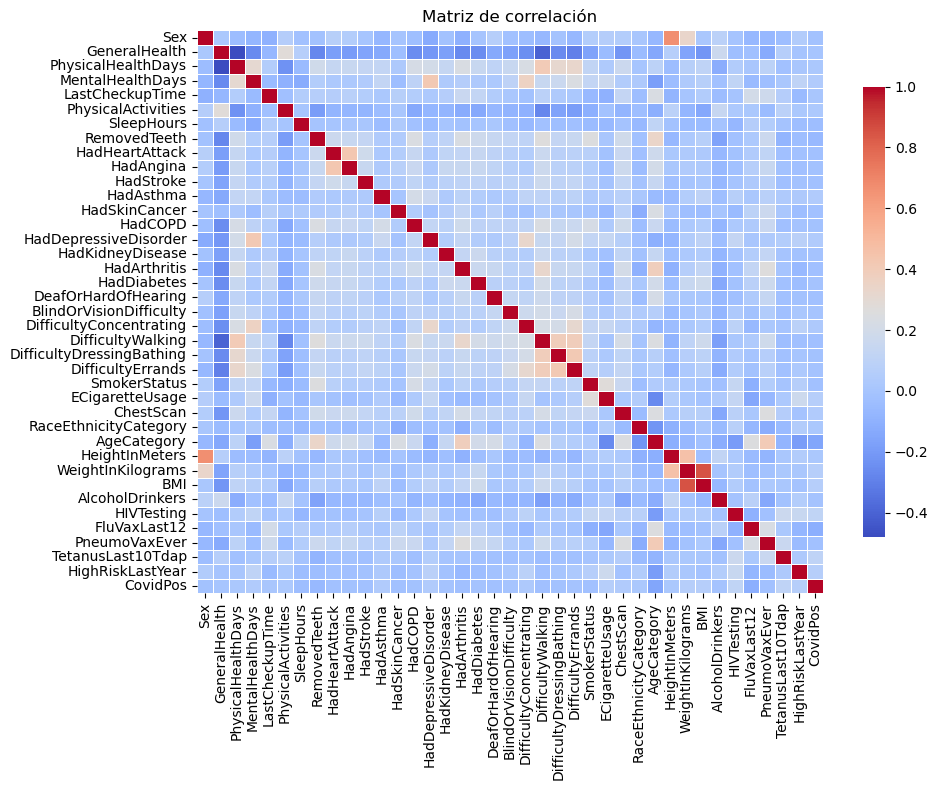

In [214]:
# variables numéricas
numerical_columns = df.select_dtypes(include=['int64','float64'])

# matriz de correlación
correlation_matrix = numerical_columns.corr()

# mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='white', cbar_kws={"shrink": .8})
plt.title('Matriz de correlación')

# mostrar el grafico
plt.tight_layout()
plt.show()

Se observan correlaciones entre las variables, algunas más interesantes que otras pero de cierta forma todas se relacionan con la variable target (HadHeartDisease)

### **Preprocesamiento de los datos**

El objetivo de aplicar modelos a este set de datos es el de predecir si la persona es propensa a tener enfermedades cardiacas basadas en los datos que proporciono.

Se realiza el preprocesamiento de los datos para luego ser utilizados en modelos.

In [215]:
#df
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [216]:
# df
df.head(5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,alabama,0,3,0.0,0.0,3,0,8.0,0,0,...,1.70,80.74,27.44,0,0,1,0,1,0,0
1,alabama,0,4,0.0,0.0,3,0,6.0,0,0,...,1.60,68.04,26.57,0,0,0,0,0,0,0
2,alabama,0,3,2.0,3.0,3,1,5.0,0,0,...,1.57,63.50,25.61,0,0,0,0,0,0,1
3,alabama,0,4,0.0,0.0,3,1,7.0,0,0,...,1.65,63.50,23.30,0,0,1,1,0,0,0
4,alabama,0,1,2.0,0.0,3,1,9.0,0,0,...,1.57,53.98,21.77,1,0,0,1,0,0,0


Se eligen como variable target a HadHeartAttack y las demas columnas seran utlilizadas como predictoras.

In [217]:
# variables categoricas y target
x = df.drop(columns=['HadHeartAttack'])  
y = df[['HadHeartAttack']]

In [218]:
# extraer columnas
numerical_features = x.select_dtypes(include=['int64', 'float64']).columns
categorical_features =x.select_dtypes(include=['object']).columns

# verificar
print("Features numericas: ", numerical_features)
print("Features categoricas: ", categorical_features)

Features numericas:  Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')
Features categoricas:  Index(['State'], dtype='object')


In [225]:
# transformadores para cada subconjunto de columnas
# numerico
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# categorico
categoric_transformer =  Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [226]:
# crear columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),  
        ('cat', categoric_transformer, categorical_features)  
    ]
)

In [227]:
# split del dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [228]:
# verificacion 
print("Variables predictoras dimensiones en train" , x_train.shape)
print("Variable target dimensiones en train" , y_train.shape)

print("Variables predictoras dimensiones en test" , x_test.shape)
print("Variable target dimensiones en test" , y_test.shape)

Variables predictoras dimensiones en train (311592, 39)
Variable target dimensiones en train (311592, 1)
Variables predictoras dimensiones en test (133540, 39)
Variable target dimensiones en test (133540, 1)


### **Modelo de regresion logistica**

Para predecir si una persona tendra o no una enfermedad cardiaca se utiliza la regresion logistica.

In [229]:
# pipeline 
model_rlogistic = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', LogisticRegression())  
])

In [230]:
# ajustar a los datos de entrenamiento
model_rlogistic.fit(x_train, y_train.values.flatten())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'H...
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['State'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [231]:
# realizar predicciones
y_pred = model_rlogistic.predict(x_test)

In [232]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.9456342668863262
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    125936
           1       0.56      0.23      0.32      7604

    accuracy                           0.95    133540
   macro avg       0.76      0.61      0.65    133540
weighted avg       0.93      0.95      0.93    133540



In [233]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[124553   1383]
 [  5877   1727]]


In [234]:
# funcion para graficar la matriz de confusion
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Etiqueta predicha')
    plt.show()

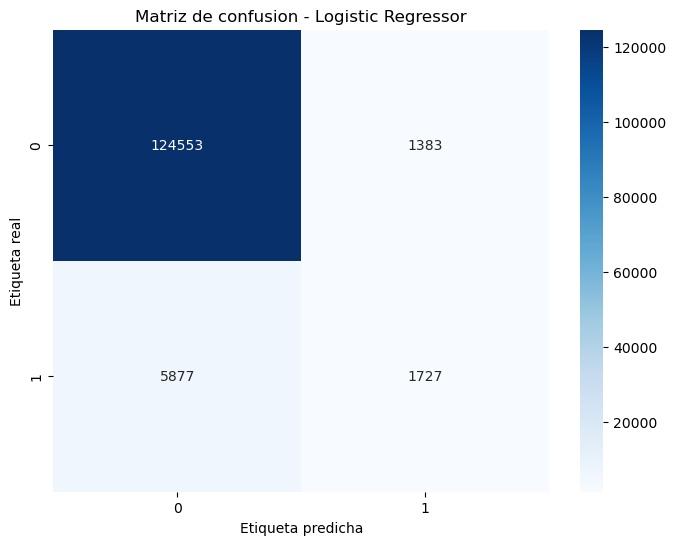

In [235]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - Logistic Regressor")

In [236]:
# convertir 'yes' a 1 y 'no' a 0 en y_test
y_test_binary = y_test.replace({'yes': 1, 'no': 0})

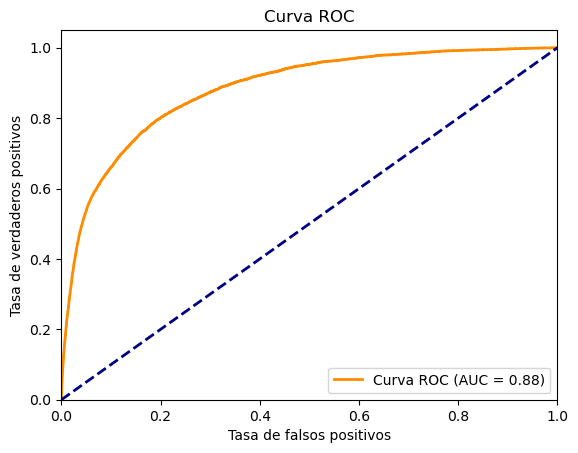

In [237]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test_binary, model_rlogistic.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

El modelo de regresion logistica realiza muy buenas predicciones para la posibilidad de tener ataques cardiacos.

### **Modelo decission tree classifier**

Para predecir si una persona es propensa a tener ataques cardiacos, se utiliza el modelo decission tree classifier

In [238]:
# pipeline 
model_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', DecisionTreeClassifier( 
    max_depth=5,  
    min_samples_split=10,  
    min_samples_leaf=5  
))])

In [239]:
# ajustar a los datos de entrenamiento
model_tree.fit(x_train, y_train.values.flatten())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'H...
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['State'], dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=5,
                                        min_samples_split=10))])

In [240]:
# realizar predicciones
y_pred = model_tree.predict(x_test)

In [241]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.9453946383106185
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    125936
           1       0.58      0.14      0.23      7604

    accuracy                           0.95    133540
   macro avg       0.77      0.57      0.60    133540
weighted avg       0.93      0.95      0.93    133540



In [242]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[125157    779]
 [  6513   1091]]


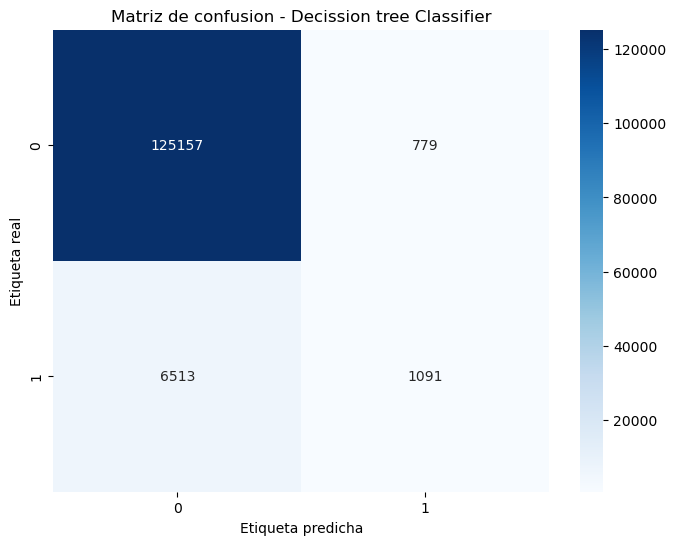

In [243]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - Decission tree Classifier")

In [244]:
# convertir 'yes' a 1 y 'no' a 0 en y_test
y_test_binary = y_test.replace({'yes': 1, 'no': 0})

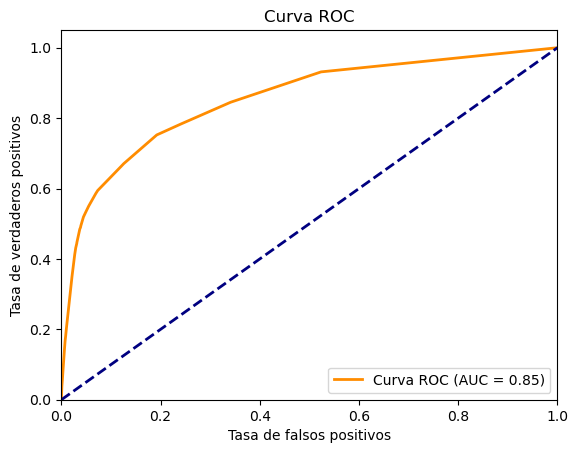

In [245]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test_binary, model_tree.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Comparando el modelo de regresión logística y el de decission trees classifier, el modelo de regresión logistica tiene una mejor performance. Al modelo de decission trees classifier se le puede aplicar GridSearchCV para mejorar los hiperparámetros.

### **Modelo XGBoost**

Para predecir si una persona es propensa a tener ataques cardiacos, se utiliza el modelo XGBoost

In [250]:
# pipeline 
model_xgboost = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', xgb.XGBClassifier(eval_metric='logloss', random_state=42) 
)])

In [251]:
# ajustar a los datos de entrenamiento
model_xgboost.fit(x_train, y_train.values.flatten())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'H...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [252]:
# realizar predicciones
y_pred = model_xgboost.predict(x_test)

In [253]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.9451624981279018
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    125936
           1       0.54      0.23      0.32      7604

    accuracy                           0.95    133540
   macro avg       0.75      0.61      0.65    133540
weighted avg       0.93      0.95      0.93    133540



In [254]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[124503   1433]
 [  5890   1714]]


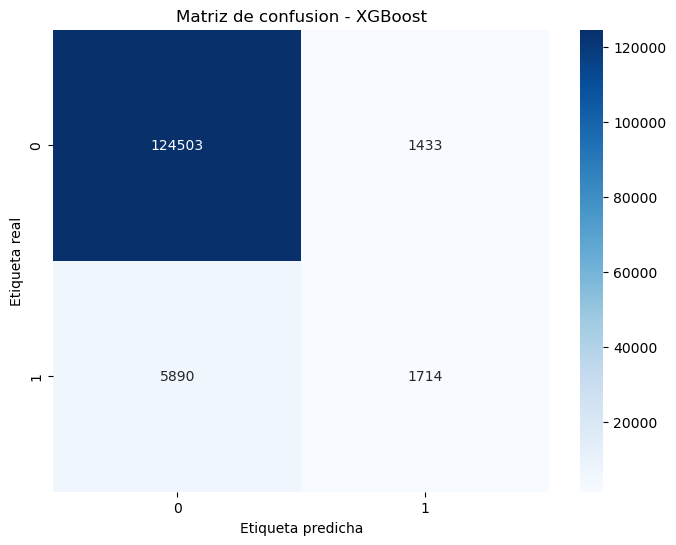

In [255]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - XGBoost")

In [256]:
# convertir 'yes' a 1 y 'no' a 0 en y_test
y_test_binary = y_test.replace({'yes': 1, 'no': 0})

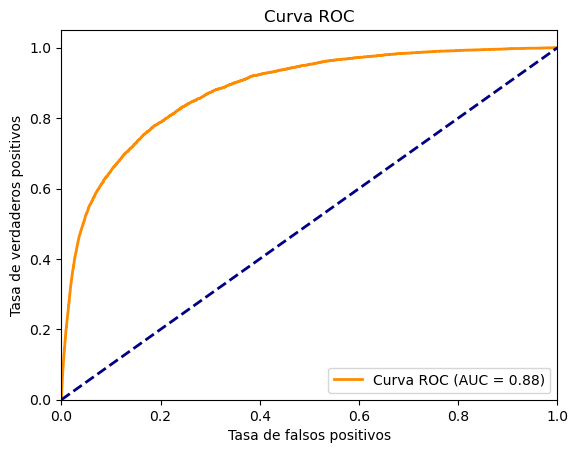

In [257]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test_binary, model_xgboost.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Se busca optimizar el modelo XGBoost usando GridSearchCV

In [264]:
# hiperparametros a probar
param_grid = {  
    'classifier__max_depth': [5, 10], 
    'classifier__learning_rate': [0.01, 0.05], 
    'classifier__n_estimators': [50, 100],
}

In [265]:
# GridSearchCV
grid_search = GridSearchCV(
    model_xgboost, 
    param_grid,  
    cv=5,  
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1  
)

In [266]:
# buscar en train
grid_search.fit(x_train, y_train.values.flatten())

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth',
       'HadAngina', 'HadStroke', 'H...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.05],
                         'classifier__max_depth': [5, 10],
                         'classifier__n_estimators': [50, 100]},
             scoring='accuracy', verbose=1)

In [267]:
# resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor R² en validación cruzada:", grid_search.best_score_)

Mejores parámetros: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}
Mejor R² en validación cruzada: 0.9477553974840618


In [268]:
# modelo ajustado
best_xgboost_model = grid_search.best_estimator_

In [269]:
# realizar predicciones
y_pred = best_xgboost_model.predict(x_test)

In [270]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.9466826419050471
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    125936
           1       0.59      0.20      0.30      7604

    accuracy                           0.95    133540
   macro avg       0.77      0.60      0.64    133540
weighted avg       0.93      0.95      0.93    133540



In [271]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[124902   1034]
 [  6086   1518]]


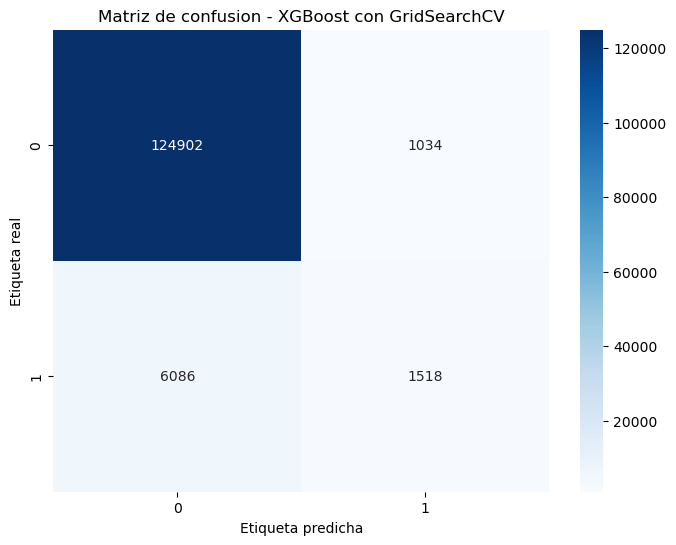

In [272]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - XGBoost con GridSearchCV")

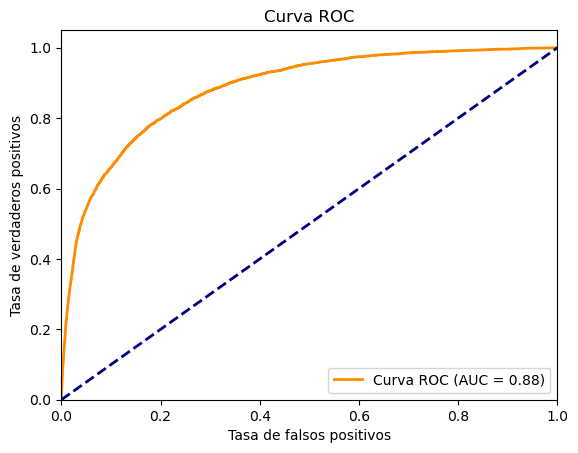

In [273]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test, best_xgboost_model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Aplicando GridSearchCV el modelo de XGBoost mejoro levemente, probablemente ajustando mejor los hiperparametros o agregando mas profundidad, sin embargo requiere mayor costo computacional debido a que el dataset es bastante amplio.